In [ ]:
# Projeto Estrutura De Dados CAGED 2021

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Nomes Completos:
#Ana Beatriz Silva de Araujo Leite
#Anna Carolina de Oliveira Vale Mendes
#Camila de Fátima Ferreira Pacheco
#Rafael dos Santos Pereira
#Rafael Bettini Dias
#Pedro Reginaldo Tome Silva

In [ ]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
low_memory=False
import requests
from bs4 import BeautifulSoup
from requests import get
import seaborn as sns


In [ ]:
#Questão 1: 
#1 – Qual foi o índice de pessoas empregadas e desempregadas em certo período, categorizadas por: - Gênero - Classe social - Faixa Etária - Nível de escolaridade - Setores (Agronegócio, Indústria, Comércio, etc...)

In [ ]:
#Importando a base de dados
tabela = ('/content/drive/MyDrive/Colab Notebooks/CAGEDLIGTH.csv')
df = pd.read_csv(tabela, delimiter=';',
                encoding='ISO-8859-1',
                error_bad_lines=False)
display(df)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,competencia,regiao,uf,municipio,secao,subclasse,saldomovimentacao,cbo2002ocupacao,categoria,graudeinstrucao,idade,horascontratuais,racacor,sexo,tipoempregador,tipoestabelecimento,tipomovimentacao,tipodedeficiencia,indtrabintermitente,indtrabparcial,salario,tamestabjan,indicadoraprendiz,fonte
0,202003,3.0,31.0,317020.0,G,4752100.0,-1.0,521110.0,999.0,7.0,21.0,44.0,6.0,3.0,0.0,1.0,31.0,0.0,0.0,0.0,1165.859985,3.0,0.0,1.0
1,202003,5.0,51.0,510795.0,G,4711301.0,-1.0,421125.0,101.0,7.0,34.0,44.0,3.0,3.0,0.0,1.0,40.0,0.0,0.0,0.0,1020.000000,7.0,0.0,1.0
2,202003,2.0,26.0,260790.0,C,3292202.0,-1.0,862150.0,101.0,7.0,37.0,44.0,6.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,1200.000000,4.0,0.0,1.0
3,202003,3.0,35.0,355030.0,N,7820500.0,-1.0,422105.0,106.0,7.0,20.0,44.0,1.0,3.0,0.0,1.0,43.0,0.0,0.0,0.0,1396.000000,10.0,0.0,1.0
4,202003,3.0,35.0,355030.0,R,9312300.0,-1.0,517330.0,101.0,7.0,36.0,44.0,2.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,2474.189941,10.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999996,202012,3.0,31.0,310620.0,J,6201501.0,1.0,212405.0,101.0,9.0,34.0,40.0,1.0,1.0,0.0,1.0,20.0,0.0,0.0,0.0,10800.000000,9.0,0.0,1.0
2999997,202012,3.0,35.0,355030.0,N,7820500.0,-1.0,322205.0,106.0,7.0,23.0,36.0,3.0,3.0,0.0,1.0,43.0,0.0,0.0,0.0,1740.560059,10.0,0.0,1.0
2999998,202012,4.0,42.0,420540.0,G,4711302.0,-1.0,517330.0,101.0,7.0,47.0,44.0,3.0,1.0,0.0,1.0,40.0,0.0,0.0,0.0,1473.849976,7.0,0.0,1.0
2999999,202012,3.0,35.0,351870.0,G,4721104.0,-1.0,521110.0,101.0,6.0,16.0,44.0,1.0,3.0,0.0,1.0,40.0,0.0,0.0,0.0,1056.569946,2.0,0.0,1.0


In [ ]:
# Pessoas empregadas e desempregadas:

In [ ]:
# filtrando por categoria 

tpmovcategoria = df.filter(['categoria'])

# remover a coluna que está 100% vazia
df = df.dropna(how='all', axis=1)

# remover a linha que tem um item vazio
df = df.dropna()
display(tpmovcategoria)

,categoria
0,999.0
1,101.0
2,101.0
3,106.0
4,101.0
...,...
2999996,101.0
2999997,106.0
2999998,101.0
2999999,101.0


In [ ]:
categoria_troca = {999: 'Não Identificado', 101:'Empregado - Geral, inclusive o empregado público da administração direta ou indireta contratado pela CLT', 102: 'Empregado - Trabalhador rural por pequeno prazo da Lei 11.718/2008', 103: 'Empregado - Aprendiz', 104: 'Empregado - Doméstico', 105: 'Empregado - Contrato a termo firmado nos termos da Lei 9.601/1998', 106: 'Trabalhador temporário - Contrato nos termos da Lei 6.019/1974', 107: 'Empregado - Contrato de trabalho Verde e Amarelo - sem acordo para antecipação mensal da multa rescisória do FGTS', 108: 'Empregado - Contrato de trabalho Verde e Amarelo - com acordo para antecipação mensal da multa rescisória do FGTS', 111: 'Empregado - Contrato de trabalho intermitente' }
df.loc[(df.categoria.isnull()), 'categoria'] = 999
df['categoria'] = df['categoria'].apply(lambda x: categoria_troca[x])

In [ ]:
display(df['categoria'].value_counts())

Empregado - Geral, inclusive o empregado público da administração direta ou indireta contratado pela CLT             2533772
Não Identificado                                                                                                      189628
Trabalhador temporário - Contrato nos termos da Lei 6.019/1974                                                        139008
Empregado - Aprendiz                                                                                                   58847
Empregado - Contrato a termo firmado nos termos da Lei 9.601/1998                                                      40526
Empregado - Contrato de trabalho intermitente                                                                          29868
Empregado - Trabalhador rural por pequeno prazo da Lei 11.718/2008                                                      7215
Empregado - Contrato de trabalho Verde e Amarelo - sem acordo para antecipação mensal da multa rescisória do FGTS        878


In [ ]:
display(df)

,competencia,regiao,uf,municipio,secao,subclasse,saldomovimentacao,cbo2002ocupacao,categoria,graudeinstrucao,idade,horascontratuais,racacor,sexo,tipoempregador,tipoestabelecimento,tipomovimentacao,tipodedeficiencia,indtrabintermitente,indtrabparcial,salario,tamestabjan,indicadoraprendiz,fonte
0,202003,3.0,31.0,317020.0,G,4752100.0,-1.0,521110.0,Não Identificado,7.0,21.0,44.0,6.0,3.0,0.0,1.0,31.0,0.0,0.0,0.0,1165.859985,3.0,0.0,1.0
1,202003,5.0,51.0,510795.0,G,4711301.0,-1.0,421125.0,"Empregado - Geral, inclusive o empregado públi...",7.0,34.0,44.0,3.0,3.0,0.0,1.0,40.0,0.0,0.0,0.0,1020.000000,7.0,0.0,1.0
2,202003,2.0,26.0,260790.0,C,3292202.0,-1.0,862150.0,"Empregado - Geral, inclusive o empregado públi...",7.0,37.0,44.0,6.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,1200.000000,4.0,0.0,1.0
3,202003,3.0,35.0,355030.0,N,7820500.0,-1.0,422105.0,Trabalhador temporário - Contrato nos termos d...,7.0,20.0,44.0,1.0,3.0,0.0,1.0,43.0,0.0,0.0,0.0,1396.000000,10.0,0.0,1.0
4,202003,3.0,35.0,355030.0,R,9312300.0,-1.0,517330.0,"Empregado - Geral, inclusive o empregado públi...",7.0,36.0,44.0,2.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,2474.189941,10.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,202012,3.0,35.0,354990.0,G,4724500.0,1.0,521125.0,"Empregado - Geral, inclusive o empregado públi...",7.0,24.0,44.0,1.0,1.0,0.0,1.0,20.0,0.0,0.0,0.0,1376.000000,4.0,0.0,1.0
2999996,202012,3.0,31.0,310620.0,J,6201501.0,1.0,212405.0,"Empregado - Geral, inclusive o empregado públi...",9.0,34.0,40.0,1.0,1.0,0.0,1.0,20.0,0.0,0.0,0.0,10800.000000,9.0,0.0,1.0
2999997,202012,3.0,35.0,355030.0,N,7820500.0,-1.0,322205.0,Trabalhador temporário - Contrato nos termos d...,7.0,23.0,36.0,3.0,3.0,0.0,1.0,43.0,0.0,0.0,0.0,1740.560059,10.0,0.0,1.0
2999998,202012,4.0,42.0,420540.0,G,4711302.0,-1.0,517330.0,"Empregado - Geral, inclusive o empregado públi...",7.0,47.0,44.0,3.0,1.0,0.0,1.0,40.0,0.0,0.0,0.0,1473.849976,7.0,0.0,1.0


In [ ]:
tpmv_troca = {31:'Demissão', 43:'Desconsiderar', 60:'Desconsiderar', 33:'Desconsiderar', 99:'Desconsiderar', 32:'Demissão', 40:'Demissão', 45:'Demissão', 50:'Demissão', 80:'Demissão', 90:'Demissão', 98:'Demissão', 10:'Admissão', 20:'Admissão', 25:'Admissão', 35:'Admissão', 70:'Admissão'}
 
df.loc[(df.tipomovimentacao.isnull()), 'tipomovimentacao'] = 9
df['tipomovimentacao'] = df['tipomovimentacao'].apply(lambda x: tpmv_troca[x])

In [ ]:
df.groupby('tipomovimentacao').size()

tipomovimentacao
Admissão         1470657
Demissão         1274771
Desconsiderar     254547
dtype: int64

In [ ]:
#Gênero:

In [ ]:
# filtrando por gênero 

tpmovsexo = df.filter(['sexo'])

# remover a coluna que está 100% vazia
df = df.dropna(how='all', axis=1)

# remover a linha que tem um item vazio
df = df.dropna()

In [ ]:
sexo_troca = {1:'Homem', 3:'Mulher'}
df.loc[(df.sexo.isnull()), 'sexo'] = 9
df['sexo'] = df['sexo'].apply(lambda x: sexo_troca[x])

In [ ]:
display(df['sexo'].value_counts())

Homem     1869145
Mulher    1130830
Name: sexo, dtype: int64

In [ ]:
display(df)

,competencia,regiao,uf,municipio,secao,subclasse,saldomovimentacao,cbo2002ocupacao,categoria,graudeinstrucao,idade,horascontratuais,racacor,sexo,tipoempregador,tipoestabelecimento,tipomovimentacao,tipodedeficiencia,indtrabintermitente,indtrabparcial,salario,tamestabjan,indicadoraprendiz,fonte
0,202003,3.0,31.0,317020.0,G,4752100.0,-1.0,521110.0,Não Identificado,7.0,21.0,44.0,6.0,Mulher,0.0,1.0,Demissão,0.0,0.0,0.0,1165.859985,3.0,0.0,1.0
1,202003,5.0,51.0,510795.0,G,4711301.0,-1.0,421125.0,"Empregado - Geral, inclusive o empregado públi...",7.0,34.0,44.0,3.0,Mulher,0.0,1.0,Demissão,0.0,0.0,0.0,1020.000000,7.0,0.0,1.0
2,202003,2.0,26.0,260790.0,C,3292202.0,-1.0,862150.0,"Empregado - Geral, inclusive o empregado públi...",7.0,37.0,44.0,6.0,Homem,0.0,1.0,Demissão,0.0,0.0,0.0,1200.000000,4.0,0.0,1.0
3,202003,3.0,35.0,355030.0,N,7820500.0,-1.0,422105.0,Trabalhador temporário - Contrato nos termos d...,7.0,20.0,44.0,1.0,Mulher,0.0,1.0,Desconsiderar,0.0,0.0,0.0,1396.000000,10.0,0.0,1.0
4,202003,3.0,35.0,355030.0,R,9312300.0,-1.0,517330.0,"Empregado - Geral, inclusive o empregado públi...",7.0,36.0,44.0,2.0,Homem,0.0,1.0,Demissão,0.0,0.0,0.0,2474.189941,10.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,202012,3.0,35.0,354990.0,G,4724500.0,1.0,521125.0,"Empregado - Geral, inclusive o empregado públi...",7.0,24.0,44.0,1.0,Homem,0.0,1.0,Admissão,0.0,0.0,0.0,1376.000000,4.0,0.0,1.0
2999996,202012,3.0,31.0,310620.0,J,6201501.0,1.0,212405.0,"Empregado - Geral, inclusive o empregado públi...",9.0,34.0,40.0,1.0,Homem,0.0,1.0,Admissão,0.0,0.0,0.0,10800.000000,9.0,0.0,1.0
2999997,202012,3.0,35.0,355030.0,N,7820500.0,-1.0,322205.0,Trabalhador temporário - Contrato nos termos d...,7.0,23.0,36.0,3.0,Mulher,0.0,1.0,Desconsiderar,0.0,0.0,0.0,1740.560059,10.0,0.0,1.0
2999998,202012,4.0,42.0,420540.0,G,4711302.0,-1.0,517330.0,"Empregado - Geral, inclusive o empregado públi...",7.0,47.0,44.0,3.0,Homem,0.0,1.0,Demissão,0.0,0.0,0.0,1473.849976,7.0,0.0,1.0


In [ ]:
plt.style.use("Solarize_Light2")

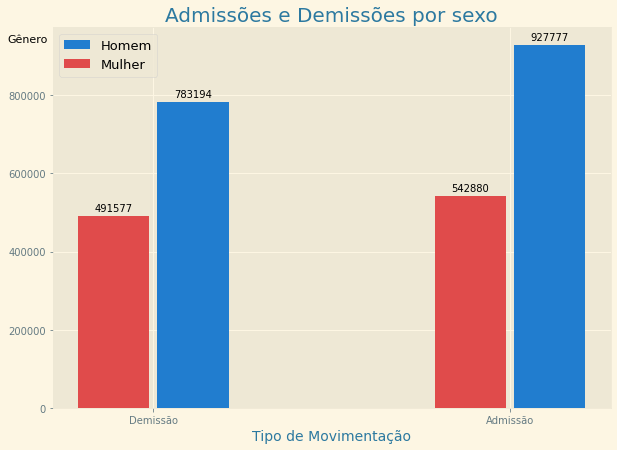

In [ ]:
Homem = df.query('sexo == "Homem"').groupby('tipomovimentacao').size().sort_values().tail(2)
Mulher = df.query('sexo == "Mulher"').groupby('tipomovimentacao').size().sort_values().tail(2)
n_homem = dict(Homem)
n_mulher = dict(Mulher)

dados = {}

tipomovimentacao = list(n_mulher.keys()) + list(n_homem.keys())
tipomovimentacao = list(dict.fromkeys(tipomovimentacao))
dados_grafico = {'tipomovimentacao': [], 'Mulher': [], 'Homem': []}
for tipomovimentacao in tipomovimentacao :
    if(tipomovimentacao in n_mulher.keys() and tipomovimentacao in n_homem.keys()):
        dados_grafico['tipomovimentacao'].append(tipomovimentacao)
        dados_grafico['Homem'].append(n_homem[tipomovimentacao])
        dados_grafico['Mulher'].append(n_mulher[tipomovimentacao])
        
        
labels = dados_grafico['tipomovimentacao']
Homem = dados_grafico['Homem']
Mulher = dados_grafico['Mulher']

x = np.arange(len(labels)) 
width = 0.20

fig, ax = plt.subplots(1,1,figsize=(10,7))
rects1 = ax.bar(x + width/1.80, Homem, width, label='Homem', color='#217DCF')
rects2 = ax.bar(x - width/1.80, Mulher, width, label='Mulher', color = '#E04B4B')

plt.xlabel('Tipo de Movimentação',color ='#2C79A0', fontsize=14, ha='center')
plt.figtext(.090,.85,'Gênero',color ='k', fontsize=11, ha='center')
ax.set_title('Admissões e Demissões por sexo', fontsize=20,color ='#2C79A0')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(loc=2,prop={'size':13})
plt.style.use("bmh")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects1)
autolabel(rects2)
plt.show()

In [ ]:
#Classe social

In [ ]:
def classeSocial(x):
        if x<2091:
            return 'Classe E'
        elif x<4181:
            return 'Classe D'
        elif x<10451:
            return 'Classe C'
        elif x<20901:
            return 'Classe B'
        else:
            return 'Classe A'



In [ ]:
df['classesocial'] = df['salario'].apply(lambda x: classeSocial(float(x)))
df.groupby('classesocial').size()


classesocial
Classe A      11184
Classe B      14903
Classe C      86526
Classe D     293280
Classe E    2594082
dtype: int64

In [ ]:
filtro = df.filter(['tipomovimentacao','classesocial'])
df = df.dropna(how='all', axis=1)
df = df.dropna()
display(filtro)

,tipomovimentacao,classesocial
0,Demissão,Classe E
1,Demissão,Classe E
2,Demissão,Classe E
3,Desconsiderar,Classe E
4,Demissão,Classe D
...,...,...
2999995,Admissão,Classe E
2999996,Admissão,Classe B
2999997,Desconsiderar,Classe E
2999998,Demissão,Classe E


In [ ]:
plt.style.use("Solarize_Light2")

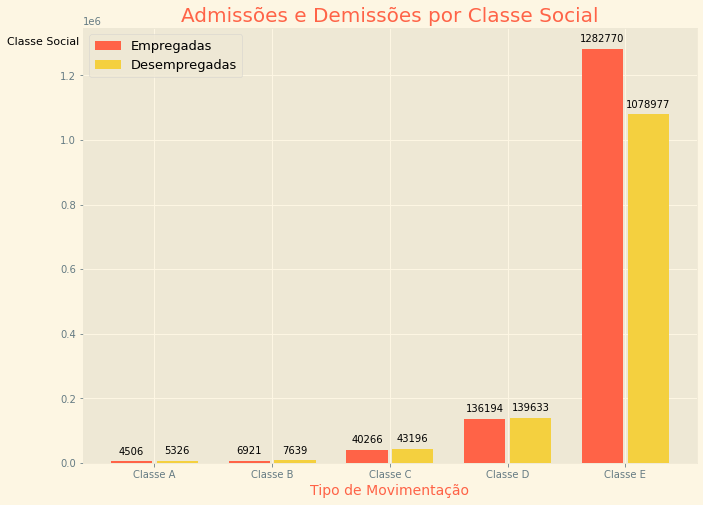

In [ ]:
demissao = df.query('tipomovimentacao == "Demissão"').groupby('classesocial').size().sort_values().tail(5)
admissao = df.query('tipomovimentacao == "Admissão"').groupby('classesocial').size().sort_values().tail(5)

n_demissao = dict(demissao)
n_admissao = dict(admissao)

dados = {}

social = list(n_demissao.keys()) + list(n_admissao.keys())
social = list(dict.fromkeys(social))

dados_grafico = {'social': [], 'demissao': [], 'admissao': []}

for social in social :
    if(social in n_demissao.keys()):        
        dados_grafico['social'].append(social)
        dados_grafico['demissao'].append(n_demissao[social])
        dados_grafico['admissao'].append(n_admissao[social])
      
        
labels = dados_grafico['social']
demissao = dados_grafico['demissao']
admissao = dados_grafico['admissao']


x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots(1,1,figsize=(11,8))
rects1 = ax.bar(x - width/1.80, admissao, width, label='Empregadas', color= '#FF6347')
rects2 = ax.bar(x + width/1.80, demissao, width, label='Desempregadas', color='#F4D03F')


plt.xlabel('Tipo de Movimentação',color ='#FF6347', fontsize=14, ha='center')
plt.figtext(.075,.85,'Classe Social',color ='k', fontsize=11, ha='center')
ax.set_title('Admissões e Demissões por Classe Social', fontsize=20,color ='#FF6347')

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(loc=2,prop={'size':13})
plt.style.use("bmh")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
plt.show()

In [ ]:
#Faixa Etária

In [ ]:
# filtrando por idade 

tpmovidade = df.filter(['idade'])

# remover a coluna que está 100% vazia
df = df.dropna(how='all', axis=1)

# remover a linha que tem um item vazio
df = df.dropna()
display(tpmovidade)

,idade
0,21.0
1,34.0
2,37.0
3,20.0
4,36.0
...,...
2999995,24.0
2999996,34.0
2999997,23.0
2999998,47.0


In [ ]:
display(df['idade'].value_counts())

22.0    120454
20.0    119778
23.0    118989
24.0    118446
21.0    117333
         ...  
93.0         3
92.0         2
95.0         2
97.0         2
94.0         1
Name: idade, Length: 84, dtype: int64

In [ ]:
filtro = df.filter(['tipomovimentacao','idade'])
df = df.dropna(how='all', axis=1)
df = df.dropna()
display(filtro)

,tipomovimentacao,idade
0,Demissão,21.0
1,Demissão,34.0
2,Demissão,37.0
3,Desconsiderar,20.0
4,Demissão,36.0
...,...,...
2999995,Admissão,24.0
2999996,Admissão,34.0
2999997,Desconsiderar,23.0
2999998,Demissão,47.0


In [ ]:
def faixaEtaria(x):
        if x<20:
            return 'Jovens de até 19 anos'
        elif x<30:
            return '20 a 30 anos'
        elif x<40:
            return '30 a 40 anos'
        elif x<50:
            return '40 a 50 anos'
        elif x<60:
            return '50 a 60 anos'
        else:
            return 'Idosos'

In [ ]:
df['faixaEtaria'] = df['idade'].apply(lambda x: faixaEtaria(float(x)))

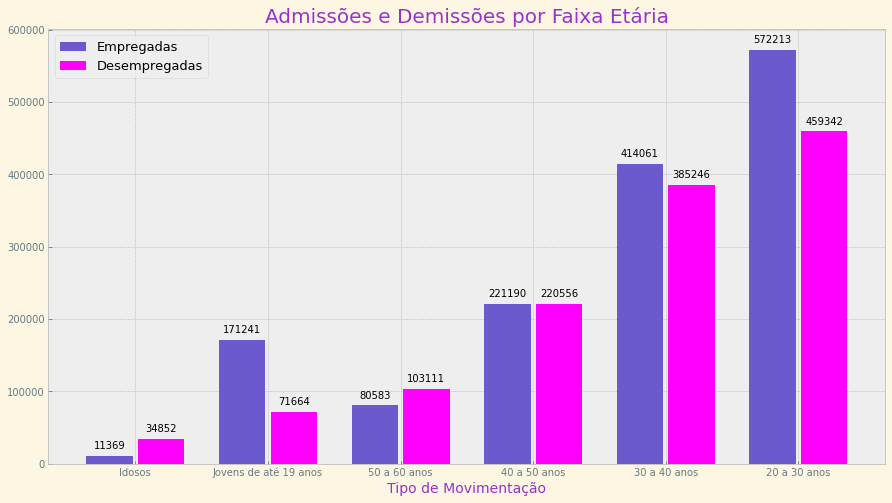

In [ ]:
demissao = df.query('tipomovimentacao == "Demissão"').groupby('faixaEtaria').size().sort_values().tail(6)
#.plot(kind='barh')
admissao = df.query('tipomovimentacao == "Admissão"').groupby('faixaEtaria').size().sort_values().tail(6)
#.plot(kind='barh')

n_demissao = dict(demissao)
n_admissao = dict(admissao)

dados = {}

faixaEtaria = list(n_demissao.keys()) + list(n_admissao.keys())
faixaEtaria = list(dict.fromkeys(faixaEtaria))

dados_grafico = {'faixaEtaria': [], 'demissao': [], 'admissao': []}

for faixaEtaria in faixaEtaria :
    if(faixaEtaria in n_demissao.keys()):        
        dados_grafico['faixaEtaria'].append(faixaEtaria)
        dados_grafico['demissao'].append(n_demissao[faixaEtaria])
        dados_grafico['admissao'].append(n_admissao[faixaEtaria])
      
        
labels = dados_grafico['faixaEtaria']
demissao = dados_grafico['demissao']
admissao = dados_grafico['admissao']


x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots(1,1,figsize=(15,8))
rects1 = ax.bar(x - width/1.80, admissao, width, label='Empregadas', color= '#6A5ACD')
rects2 = ax.bar(x + width/1.80, demissao, width, label='Desempregadas', color='#FF00FF')


plt.xlabel('Tipo de Movimentação',color ='#9932CC', fontsize=14, ha='center')
ax.set_title('Admissões e Demissões por Faixa Etária', fontsize=20,color ='#9932CC')

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(loc=2,prop={'size':13})
plt.style.use("bmh")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
plt.show()

In [ ]:
# Nível de escolaridade

In [ ]:
# filtrando por graudeinstrução

tpmovgraudeinstrucao = df.filter(['graudeinstrucao'])

# remover a coluna que está 100% vazia
df = df.dropna(how='all', axis=1)

# remover a linha que tem um item vazio
df = df.dropna()
display(tpmovgraudeinstrucao)

,graudeinstrucao
0,7.0
1,7.0
2,7.0
3,7.0
4,7.0
...,...
2999995,7.0
2999996,9.0
2999997,7.0
2999998,7.0


In [ ]:
def escolaridade(x):
        if x==1:
            return 'Analfabeto'
        elif x==2:
            return 'Até 5ª Incompleto'
        elif x==3:
            return '5ª Completo Fundamental'
        elif x==4:
            return '6ª a 9ª Fundamental'
        elif x==5:
            return 'Fundamental Completo'
        elif x==6:
            return 'Médio Incompleto'
        elif x==7:
            return 'Médio Completo'
        elif x==8:
            return 'Superior Incompleto'
        elif x==9:
            return 'Superior Completo'
        elif x==10:
            return 'Mestrado'
        elif x==11:
            return 'Doutorado'
        elif x==80:
            return 'Pós-Graduação completa'
        else:
            return 'Não Identificado'

In [ ]:
df['escolaridade'] = df['graudeinstrucao'].apply(lambda x: escolaridade(float(x)))

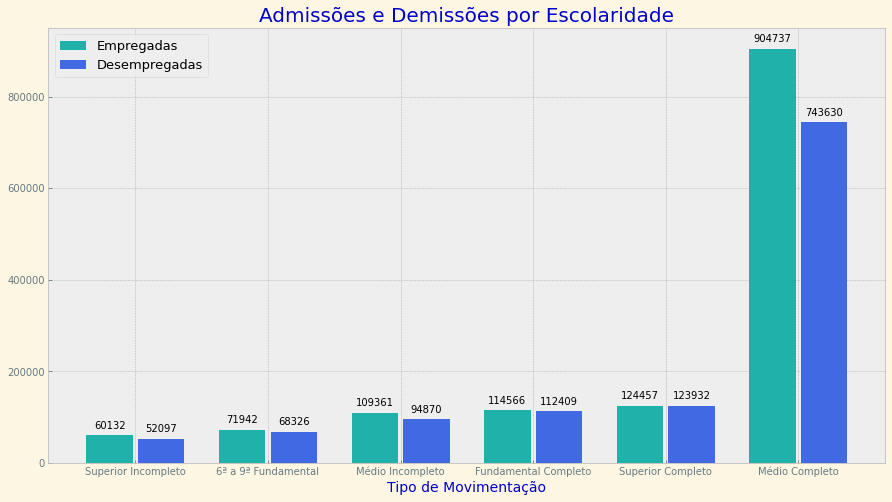

In [ ]:
demissao = df.query('tipomovimentacao == "Demissão"').groupby('escolaridade').size().sort_values().tail(6)
#.plot(kind='barh')
admissao = df.query('tipomovimentacao == "Admissão"').groupby('escolaridade').size().sort_values().tail(6)
#.plot(kind='barh')

n_demissao = dict(demissao)
n_admissao = dict(admissao)

dados = {}

escolaridade = list(n_demissao.keys()) + list(n_admissao.keys())
escolaridade = list(dict.fromkeys(escolaridade))

dados_grafico = {'escolaridade': [], 'demissao': [], 'admissao': []}

for escolaridade in escolaridade :
    if(escolaridade in n_demissao.keys()):        
        dados_grafico['escolaridade'].append(escolaridade)
        dados_grafico['demissao'].append(n_demissao[escolaridade])
        dados_grafico['admissao'].append(n_admissao[escolaridade])
      
        
labels = dados_grafico['escolaridade']
demissao = dados_grafico['demissao']
admissao = dados_grafico['admissao']


x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots(1,1,figsize=(15,8))
rects1 = ax.bar(x - width/1.80, admissao, width, label='Empregadas', color= '#20B2AA')
rects2 = ax.bar(x + width/1.80, demissao, width, label='Desempregadas', color='#4169E1')


plt.xlabel('Tipo de Movimentação',color ='#0000CD', fontsize=14, ha='center')
ax.set_title('Admissões e Demissões por Escolaridade', fontsize=20,color ='#0000CD')

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(loc=2,prop={'size':13})
plt.style.use("bmh")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
plt.show()

In [ ]:
#Setores (Agronegócio, Indústria, Comércio, etc...)

In [ ]:
# filtrando por secao

tpmovsecao = df.filter(['secao'])

# remover a coluna que está 100% vazia
df = df.dropna(how='all', axis=1)

# remover a linha que tem um item vazio
df = df.dropna()
display(tpmovsecao)

,secao
0,G
1,G
2,C
3,N
4,R
...,...
2999995,G
2999996,J
2999997,N
2999998,G


In [ ]:
def setor(x):
        if x=='G':
            return 'Comércio'
        elif x=='A':
            return 'Agricultura e Pecuária'
        elif x=='C':
            return 'Indústrias de Transformação'
        elif x=='P':
            return 'Educação'
        elif x=='E':
            return 'Água e Esgoto'
        else:
            return 'Outro'

In [ ]:
df['setor'] = df['secao'].apply(lambda x: setor(x))

In [ ]:
filtro = df.filter(['tipomovimentacao','setor'])
df = df.dropna(how='all', axis=1)
df = df.dropna()

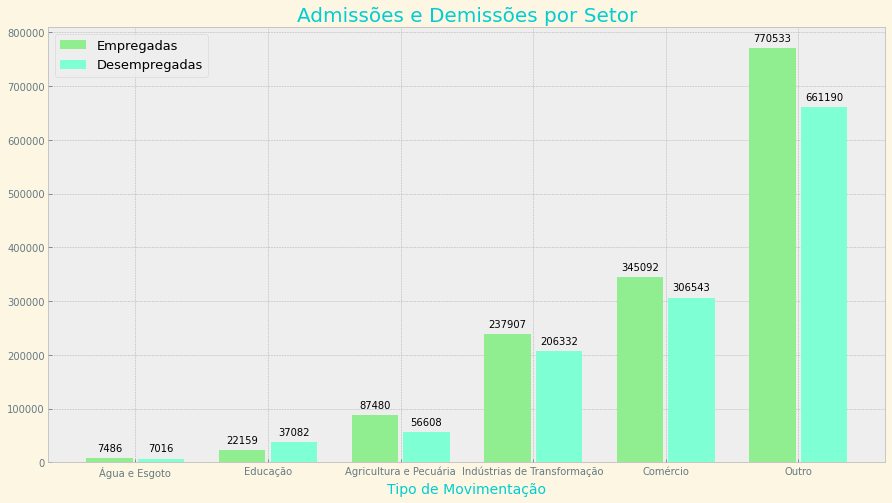

In [ ]:
demissao = df.query('tipomovimentacao == "Demissão"').groupby('setor').size().sort_values().tail(6)
#.plot(kind='barh')
admissao = df.query('tipomovimentacao == "Admissão"').groupby('setor').size().sort_values().tail(6)
#.plot(kind='barh')

n_demissao = dict(demissao)
n_admissao = dict(admissao)

dados = {}

setor = list(n_demissao.keys()) + list(n_admissao.keys())
setor = list(dict.fromkeys(setor))

dados_grafico = {'setor': [], 'demissao': [], 'admissao': []}

for setor in setor :
    if(setor in n_demissao.keys()):        
        dados_grafico['setor'].append(setor)
        dados_grafico['demissao'].append(n_demissao[setor])
        dados_grafico['admissao'].append(n_admissao[setor])
      
        
labels = dados_grafico['setor']
demissao = dados_grafico['demissao']
admissao = dados_grafico['admissao']


x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots(1,1,figsize=(15,8))
rects1 = ax.bar(x - width/1.80, admissao, width, label='Empregadas', color= '#90EE90')
rects2 = ax.bar(x + width/1.80, demissao, width, label='Desempregadas', color='#7FFFD4')


plt.xlabel('Tipo de Movimentação',color ='#00CED1', fontsize=14, ha='center')
ax.set_title('Admissões e Demissões por Setor', fontsize=20,color ='#00CED1')

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(loc=2,prop={'size':13})
plt.style.use("bmh")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
plt.show()

In [ ]:
#Questão 2
#2 – Quais foram as estatísticas de consumo/gastos após o aumento ou diminuição do: - Emprego - Desemprego

In [ ]:
tabela1 = (/content/drive/MyDrive/Colab Notebooks/CAGEDLIGTH.csv)
df1 = pd.read_csv(tabela1, delimiter=';',
                encoding='UTF-8',
                error_bad_lines=False)
display(df1)

In [ ]:
# Pessoas empregadas e desempregadas:
# filtrando por categoria 

tpmovcategoria = df1.filter(['categoria'])

# remover a coluna que está 100% vazia
df1 = df1.dropna(how='all', axis=1)

# remover a linha que tem um item vazio
df1 = df1.dropna()
display(tpmovcategoria)

In [ ]:
categoria_troca = {999: 'Não Identificado', 101:'Empregado - Geral, inclusive o empregado público da administração direta ou indireta contratado pela CLT', 102: 'Empregado - Trabalhador rural por pequeno prazo da Lei 11.718/2008', 103: 'Empregado - Aprendiz', 104: 'Empregado - Doméstico', 105: 'Empregado - Contrato a termo firmado nos termos da Lei 9.601/1998', 106: 'Trabalhador temporário - Contrato nos termos da Lei 6.019/1974', 107: 'Empregado - Contrato de trabalho Verde e Amarelo - sem acordo para antecipação mensal da multa rescisória do FGTS', 108: 'Empregado - Contrato de trabalho Verde e Amarelo - com acordo para antecipação mensal da multa rescisória do FGTS', 111: 'Empregado - Contrato de trabalho intermitente' }
df1.loc[(df1.categoria.isnull()), 'categoria'] = 999
df1['categoria'] = df1['categoria'].apply(lambda x: categoria_troca[x])

In [ ]:
tipoMov = {
10:'Admissão', 20:'Admissão', 25:'Admissão', 31:'Demissão', 32:'Demissão', 33:'Demissão', 35:'Admissão', 
40:'Demissão', 43:'Demissão', 45:'Demissão', 50:'Demissão', 60:'Demissão', 70:'Admissão', 80:'Demissão', 
90:'Demissão', 98:'Demissão', 99:'Não Identificado'}

In [ ]:
df1.loc[(df1.tipomovimentacao.isnull()), 'tipomovimentacao'] = 9
df1['tipomovimentacao'] = df1['tipomovimentacao'].apply(lambda x: tipoMov[x])

In [ ]:
df1.groupby('tipomovimentacao').size()

In [ ]:
display(df1)

In [ ]:
#tabela = ("/content/drive/MyDrive/CAGED/indicadores brasil.csv")
tabela = ("/content/drive/MyDrive/Colab Notebooks/indicadores_brasil.csv")
df = pd.read_csv(tabela, delimiter=';',
                encoding='UTF-8',
                error_bad_lines=False)
display(df)

In [ ]:
display(df['Indicadores Brasil'].value_counts())

In [ ]:
# filtrando por Indicadores Brasil

tpmovIndicadoresBrasil = df.filter(['Indicadores Brasil'])

# remover a coluna que está 100% vazia
df = df.dropna(how='all', axis=1)

# remover a linha que tem um item vazio
df = df.dropna()

In [ ]:
display(df)

In [ ]:
display(df['2019'].value_counts())

In [ ]:
df3 = pd.concat([df1, df], axis=1, join="inner")
display(df3)

In [ ]:
def IndicadoresBrasil(x):
        if x==1:
            return 'PIB Total (a)'
        elif x==2:
            return 'PIB Total (a)'
        elif x==3:
            return 'Agropecuária'
        elif x==4:
            return 'Indústria'
        elif x==5:
            return 'Serviços'
        elif x==6:
            return 'Taxa de Investimento (b)'
        elif x==7:
            return 'Produção industrial (c)'
        elif x==8:
            return 'Volume de vendas do comércio varejista (l)'
        elif x==9:
            return 'Arrecadação IPI'
        elif x==10:
            return 'Arrecadação ICMS Brasil (d)'
        elif x==11:
            return 'Arrecadação ICMS SP (d)'
        elif x==12:
            return 'ICMS SP/ICMS Brasil'
        elif x==13:
            return 'Massa de rendimentos'
        elif x==14:
            return 'Rendimento médio real'
        elif x==15:
            return 'Emprego (e)'
        elif x==16:
            return 'Taxa de desemprego (média)'
        elif x==17:
            return 'Saldo da balança comercial'
        elif x==18:
            return 'Exportações (FOB)'
        elif x==19:
            return 'Importações (FOB)'
        elif x==20:
            return 'Reservas externas (f)'
        elif x==21:
            return 'Juros nominais (cdi-over)'
        elif x==22:
            return 'Taxa de Câmbio Efetiva Real (g)'
        elif x==23:
            return 'Inflação (h)'
        elif x==24:
            return 'IGP-DI'
        elif x==25:
            return 'Inflação (h)'
        elif x==26:
            return 'IPA'
        elif x==27:
            return 'INPC'
        elif x==28:
            return 'IPCA'
        else:
            return 'Não Identificado'

In [ ]:
df1.groupby('tipomovimentacao').size()

In [ ]:
result.info()

In [ ]:
#Estilos usados no layout do gráfico "Solarize_Light e bmh"
plt.style.use("Solarize_Light2")

In [ ]:
 result['Indicadores Brasil'] = result['Indicadores Brasil'].apply(lambda x: IndicadoresBrasil(x))

In [ ]:
import plotly.express as px

fig = px.histogram(df3, x='Indicadores Brasil', color="tipomovimentacao")
     
fig.show()

In [ ]:
display(df1['tipomovimentacao'])

In [ ]:
#Questão 3: 
#3 - Quero saber a quantidade de admissões/demissões por gênero no período da pandemia.

In [ ]:
#Importando a base de dados
tabela = ('/content/drive/MyDrive/Colab Notebooks/CAGEDLIGTH.csv')
df = pd.read_csv(tabela, delimiter=';',
                encoding='ISO-8859-1',
                error_bad_lines=False)
display(df)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,competencia,regiao,uf,municipio,secao,subclasse,saldomovimentacao,cbo2002ocupacao,categoria,graudeinstrucao,idade,horascontratuais,racacor,sexo,tipoempregador,tipoestabelecimento,tipomovimentacao,tipodedeficiencia,indtrabintermitente,indtrabparcial,salario,tamestabjan,indicadoraprendiz,fonte
0,202003,3.0,31.0,317020.0,G,4752100.0,-1.0,521110.0,999.0,7.0,21.0,44.0,6.0,3.0,0.0,1.0,31.0,0.0,0.0,0.0,1165.859985,3.0,0.0,1.0
1,202003,5.0,51.0,510795.0,G,4711301.0,-1.0,421125.0,101.0,7.0,34.0,44.0,3.0,3.0,0.0,1.0,40.0,0.0,0.0,0.0,1020.000000,7.0,0.0,1.0
2,202003,2.0,26.0,260790.0,C,3292202.0,-1.0,862150.0,101.0,7.0,37.0,44.0,6.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,1200.000000,4.0,0.0,1.0
3,202003,3.0,35.0,355030.0,N,7820500.0,-1.0,422105.0,106.0,7.0,20.0,44.0,1.0,3.0,0.0,1.0,43.0,0.0,0.0,0.0,1396.000000,10.0,0.0,1.0
4,202003,3.0,35.0,355030.0,R,9312300.0,-1.0,517330.0,101.0,7.0,36.0,44.0,2.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,2474.189941,10.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999996,202012,3.0,31.0,310620.0,J,6201501.0,1.0,212405.0,101.0,9.0,34.0,40.0,1.0,1.0,0.0,1.0,20.0,0.0,0.0,0.0,10800.000000,9.0,0.0,1.0
2999997,202012,3.0,35.0,355030.0,N,7820500.0,-1.0,322205.0,106.0,7.0,23.0,36.0,3.0,3.0,0.0,1.0,43.0,0.0,0.0,0.0,1740.560059,10.0,0.0,1.0
2999998,202012,4.0,42.0,420540.0,G,4711302.0,-1.0,517330.0,101.0,7.0,47.0,44.0,3.0,1.0,0.0,1.0,40.0,0.0,0.0,0.0,1473.849976,7.0,0.0,1.0
2999999,202012,3.0,35.0,351870.0,G,4721104.0,-1.0,521110.0,101.0,6.0,16.0,44.0,1.0,3.0,0.0,1.0,40.0,0.0,0.0,0.0,1056.569946,2.0,0.0,1.0


In [ ]:
# filtrando por tipomovimentação e sexo

tpmovsexo = df.filter(['tipomovimentacao','sexo'])

# remover a coluna que está 100% vazia
df = df.dropna(how='all', axis=1)

# remover a linha que tem um item vazio
df = df.dropna()

In [ ]:
display(df)

,competencia,regiao,uf,municipio,secao,subclasse,saldomovimentacao,cbo2002ocupacao,categoria,graudeinstrucao,idade,horascontratuais,racacor,sexo,tipoempregador,tipoestabelecimento,tipomovimentacao,tipodedeficiencia,indtrabintermitente,indtrabparcial,salario,tamestabjan,indicadoraprendiz,fonte
0,202003,3.0,31.0,317020.0,G,4752100.0,-1.0,521110.0,999.0,7.0,21.0,44.0,6.0,3.0,0.0,1.0,31.0,0.0,0.0,0.0,1165.859985,3.0,0.0,1.0
1,202003,5.0,51.0,510795.0,G,4711301.0,-1.0,421125.0,101.0,7.0,34.0,44.0,3.0,3.0,0.0,1.0,40.0,0.0,0.0,0.0,1020.000000,7.0,0.0,1.0
2,202003,2.0,26.0,260790.0,C,3292202.0,-1.0,862150.0,101.0,7.0,37.0,44.0,6.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,1200.000000,4.0,0.0,1.0
3,202003,3.0,35.0,355030.0,N,7820500.0,-1.0,422105.0,106.0,7.0,20.0,44.0,1.0,3.0,0.0,1.0,43.0,0.0,0.0,0.0,1396.000000,10.0,0.0,1.0
4,202003,3.0,35.0,355030.0,R,9312300.0,-1.0,517330.0,101.0,7.0,36.0,44.0,2.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,2474.189941,10.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,202012,3.0,35.0,354990.0,G,4724500.0,1.0,521125.0,101.0,7.0,24.0,44.0,1.0,1.0,0.0,1.0,20.0,0.0,0.0,0.0,1376.000000,4.0,0.0,1.0
2999996,202012,3.0,31.0,310620.0,J,6201501.0,1.0,212405.0,101.0,9.0,34.0,40.0,1.0,1.0,0.0,1.0,20.0,0.0,0.0,0.0,10800.000000,9.0,0.0,1.0
2999997,202012,3.0,35.0,355030.0,N,7820500.0,-1.0,322205.0,106.0,7.0,23.0,36.0,3.0,3.0,0.0,1.0,43.0,0.0,0.0,0.0,1740.560059,10.0,0.0,1.0
2999998,202012,4.0,42.0,420540.0,G,4711302.0,-1.0,517330.0,101.0,7.0,47.0,44.0,3.0,1.0,0.0,1.0,40.0,0.0,0.0,0.0,1473.849976,7.0,0.0,1.0


In [ ]:
sexo_troca = {1:'Homem', 3:'Mulher'}
df.loc[(df.sexo.isnull()), 'sexo'] = 9
df['sexo'] = df['sexo'].apply(lambda x: sexo_troca[x])

In [ ]:
display(df['sexo'].value_counts())

Homem     1869145
Mulher    1130830
Name: sexo, dtype: int64

In [ ]:
tpmv_troca = {31:'Demissão', 43:'Desconsiderar', 60:'Desconsiderar', 33:'Desconsiderar', 99:'Desconsiderar', 32:'Demissão', 40:'Demissão', 45:'Demissão', 50:'Demissão', 80:'Demissão', 90:'Demissão', 98:'Demissão', 10:'Admissão', 20:'Admissão', 25:'Admissão', 35:'Admissão', 70:'Admissão'}
 
df.loc[(df.tipomovimentacao.isnull()), 'tipomovimentacao'] = 9
df['tipomovimentacao'] = df['tipomovimentacao'].apply(lambda x: tpmv_troca[x])

In [ ]:
df.groupby('tipomovimentacao').size()

tipomovimentacao
Admissão         1470657
Demissão         1274771
Desconsiderar     254547
dtype: int64

In [ ]:
#Estilos usados no layout do gráfico "Solarize_Light e bmh"
plt.style.use("Solarize_Light2")

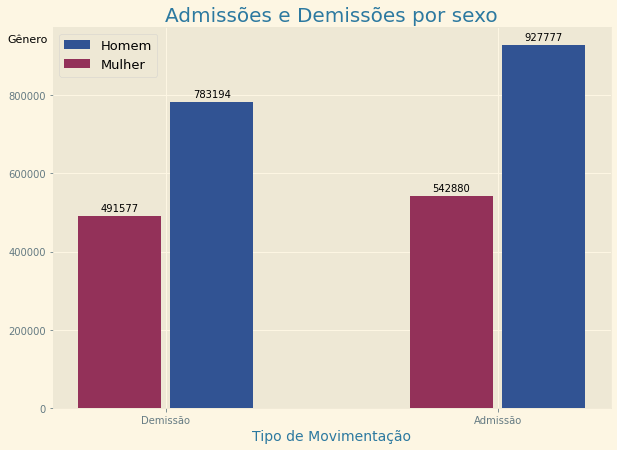

In [ ]:
#Comparação entre o número de pessoas Admitidas e Demitidas por gênero.

Homem = df.query('sexo == "Homem"').groupby('tipomovimentacao').size().sort_values().tail(2)
Mulher = df.query('sexo == "Mulher"').groupby('tipomovimentacao').size().sort_values().tail(2)
n_homem = dict(Homem)
n_mulher = dict(Mulher)

dados = {}

tipomovimentacao = list(n_mulher.keys()) + list(n_homem.keys())
tipomovimentacao = list(dict.fromkeys(tipomovimentacao))
dados_grafico = {'tipomovimentacao': [], 'Mulher': [], 'Homem': []}
for tipomovimentacao in tipomovimentacao :
    if(tipomovimentacao in n_mulher.keys() and tipomovimentacao in n_homem.keys()):
        dados_grafico['tipomovimentacao'].append(tipomovimentacao)
        dados_grafico['Homem'].append(n_homem[tipomovimentacao])
        dados_grafico['Mulher'].append(n_mulher[tipomovimentacao])
        
        
labels = dados_grafico['tipomovimentacao']
Homem = dados_grafico['Homem']
Mulher = dados_grafico['Mulher']

x = np.arange(len(labels)) 
width = 0.25

fig, ax = plt.subplots(1,1,figsize=(10,7))
rects1 = ax.bar(x + width/1.80, Homem, width, label='Homem', color='#315393')
rects2 = ax.bar(x - width/1.80, Mulher, width, label='Mulher', color = '#933159')

plt.xlabel('Tipo de Movimentação',color ='#2C79A0', fontsize=14, ha='center')
plt.figtext(.090,.85,'Gênero',color ='k', fontsize=11, ha='center')
ax.set_title('Admissões e Demissões por sexo', fontsize=20,color ='#2C79A0')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(loc=2,prop={'size':13})
plt.style.use("bmh")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects1)
autolabel(rects2)
plt.show()

In [ ]:
#Questão4
#4 - Quero saber a quantidade de demissões por tipo, tipo movimentação / demissão. - Diferença salarial entre homens e mulheres admitidos; - Diferença salarial entre homens e mulheres demitidos; - Média salarial por raça/cor;

In [ ]:
tabela = ('/content/drive/MyDrive/CAGEDLIGTH.csv')
df = pd.read_csv(tabela, delimiter=';',
                encoding='ISO-8859-1',
                error_bad_lines=False)
display(df)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,competencia,regiao,uf,municipio,secao,subclasse,saldomovimentacao,cbo2002ocupacao,categoria,graudeinstrucao,idade,horascontratuais,racacor,sexo,tipoempregador,tipoestabelecimento,tipomovimentacao,tipodedeficiencia,indtrabintermitente,indtrabparcial,salario,tamestabjan,indicadoraprendiz,fonte
0,202003,3.0,31.0,317020.0,G,4752100.0,-1.0,521110.0,999.0,7.0,21.0,44.0,6.0,3.0,0.0,1.0,31.0,0.0,0.0,0.0,1165.859985,3.0,0.0,1.0
1,202003,5.0,51.0,510795.0,G,4711301.0,-1.0,421125.0,101.0,7.0,34.0,44.0,3.0,3.0,0.0,1.0,40.0,0.0,0.0,0.0,1020.000000,7.0,0.0,1.0
2,202003,2.0,26.0,260790.0,C,3292202.0,-1.0,862150.0,101.0,7.0,37.0,44.0,6.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,1200.000000,4.0,0.0,1.0
3,202003,3.0,35.0,355030.0,N,7820500.0,-1.0,422105.0,106.0,7.0,20.0,44.0,1.0,3.0,0.0,1.0,43.0,0.0,0.0,0.0,1396.000000,10.0,0.0,1.0
4,202003,3.0,35.0,355030.0,R,9312300.0,-1.0,517330.0,101.0,7.0,36.0,44.0,2.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,2474.189941,10.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999996,202012,3.0,31.0,310620.0,J,6201501.0,1.0,212405.0,101.0,9.0,34.0,40.0,1.0,1.0,0.0,1.0,20.0,0.0,0.0,0.0,10800.000000,9.0,0.0,1.0
2999997,202012,3.0,35.0,355030.0,N,7820500.0,-1.0,322205.0,106.0,7.0,23.0,36.0,3.0,3.0,0.0,1.0,43.0,0.0,0.0,0.0,1740.560059,10.0,0.0,1.0
2999998,202012,4.0,42.0,420540.0,G,4711302.0,-1.0,517330.0,101.0,7.0,47.0,44.0,3.0,1.0,0.0,1.0,40.0,0.0,0.0,0.0,1473.849976,7.0,0.0,1.0
2999999,202012,3.0,35.0,351870.0,G,4721104.0,-1.0,521110.0,101.0,6.0,16.0,44.0,1.0,3.0,0.0,1.0,40.0,0.0,0.0,0.0,1056.569946,2.0,0.0,1.0


In [ ]:
# filtrando por tipomovimentação e sexo

tpmovsexo = df.filter(['tipomovimentacao','sexo'])

# remover a coluna que está 100% vazia
df = df.dropna(how='all', axis=1)

# remover a linha que tem um item vazio
df = df.dropna()
display(tpmovsexo)

,tipomovimentacao,sexo
0,31.0,3.0
1,40.0,3.0
2,31.0,1.0
3,43.0,3.0
4,31.0,1.0
...,...,...
2999996,20.0,1.0
2999997,43.0,3.0
2999998,40.0,1.0
2999999,40.0,3.0


In [ ]:
sexo_troca = {1:'Homem', 3:'Mulher'}
df.loc[(df.sexo.isnull()), 'sexo'] = 9
df['sexo'] = df['sexo'].apply(lambda x: sexo_troca[x])

In [ ]:
display(df['sexo'].value_counts())

Homem     1869145
Mulher    1130830
Name: sexo, dtype: int64

In [ ]:
df = df.assign(tipomovimentacao2=0)
df['tipomovimentacao2'] = df['tipomovimentacao']

In [ ]:
tpmv_troca = {31:'Demissão', 43:'Desconsiderar', 60:'Desconsiderar', 33:'Desconsiderar', 99:'Desconsiderar', 32:'Demissão', 40:'Demissão', 45:'Demissão', 50:'Demissão', 80:'Demissão', 90:'Demissão', 98:'Demissão', 10:'Admissão', 20:'Admissão', 25:'Admissão', 35:'Admissão', 70:'Admissão'}
 
df.loc[(df.tipomovimentacao.isnull()), 'tipomovimentacao'] = 9
df['tipomovimentacao'] = df['tipomovimentacao'].apply(lambda x: tpmv_troca[x])

In [ ]:
raca_troca = {1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena', 6:'Não informada', 9:'Não identificada'}
df.loc[(df.racacor.isnull()), 'racacor'] = 9
df['racacor'] = df['racacor'].apply(lambda x: raca_troca[x])

In [ ]:
df.groupby('tipomovimentacao').size()

tipomovimentacao
Admissão         1470657
Demissão         1274771
Desconsiderar     254547
dtype: int64

In [ ]:
#Estilos usados no layout do gráfico "Solarize_Light e bmh"
plt.style.use("Solarize_Light2")

In [ ]:
#Cria um novo dataframe para cado dado de demitidos e admitidos separadamente
Demitidos = pd.DataFrame(columns=['salario','demitidos','genero'])
Admitidos = pd.DataFrame(columns=['salario','admitidos','genero'])

Demitidos['demitidos'] = df['tipomovimentacao']
Admitidos['admitidos'] = df['tipomovimentacao']

Demitidos['salario'] = df['salario']
Admitidos['salario'] = df['salario']

Demitidos['genero'] = df['sexo']
Admitidos['genero'] = df['sexo']

demitido = Demitidos.loc[(Demitidos.demitidos !='Demissão'),'demitidos'].index
admitido = Admitidos.loc[(Admitidos.admitidos !='Admissão'),'admitidos'].index


Demitidos = Demitidos.drop(demitido)
Admitidos = Admitidos.drop(admitido)



In [ ]:
Admitidos.sample(5)

,salario,admitidos,genero
1725388,1362.689941,Admissão,Homem
2357388,1308.000000,Admissão,Mulher
1131028,1045.000000,Admissão,Homem
1230337,1392.020020,Admissão,Homem
2952334,1661.000000,Admissão,Homem


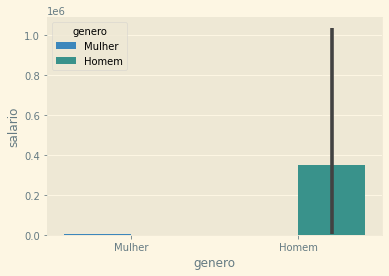

In [ ]:
#Diferença salarial entre admitidos
sns.barplot(data=Admitidos,x='genero', y ='salario',hue='genero')

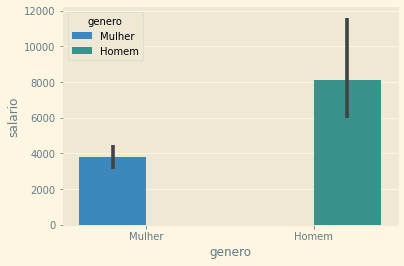

In [ ]:
#Diferença salarial entre demitidos
sns.barplot(data=Demitidos,x='genero', y ='salario',hue='genero')

In [ ]:
#Media salarial raça/cor

Total_Branca = len(df.loc[(df.racacor =='Branca'),'racacor'])
Total_Preta = len(df.loc[(df.racacor =='Preta'),'racacor'])
Total_Branca = len(df.loc[(df.racacor =='Branca'),'racacor'])
Total_Parda = len(df.loc[(df.racacor =='Parda'),'racacor'])
Total_Amarela = len(df.loc[(df.racacor =='Amarela'),'racacor'])
Total_Indígena = len(df.loc[(df.racacor =='Indígena'),'racacor'])


I_Preta = df.loc[(df.racacor =='Preta'),'racacor'].index
I_Branca = df.loc[(df.racacor =='Branca'),'racacor'].index
I_Parda = df.loc[(df.racacor =='Parda'),'racacor'].index
I_Amarela = df.loc[(df.racacor =='Amarela'),'racacor'].index
I_Indígena = df.loc[(df.racacor =='Indígena'),'racacor'].index

In [ ]:
T_Preta = df['salario'][I_Preta].sum()
T_Branca = df['salario'][I_Branca].sum()
T_Parda = df['salario'][I_Parda].sum()
T_Amarela = df['salario'][I_Amarela].sum()
T_Indígena = df['salario'][I_Indígena].sum()


In [ ]:
M_Preta = T_Preta/Total_Preta
M_Branca = T_Branca/Total_Branca
M_Parda = T_Parda/Total_Parda
M_Amarela = T_Amarela/Total_Amarela
M_Indígena =T_Indígena/Total_Indígena

In [ ]:
media = pd.DataFrame(columns=['cor','media'])

In [ ]:
media['media']= [M_Preta,M_Branca,M_Parda,M_Amarela,M_Indígena]
media['cor'] = ['Preta','Branca','Parda','Amarela','Indígena']

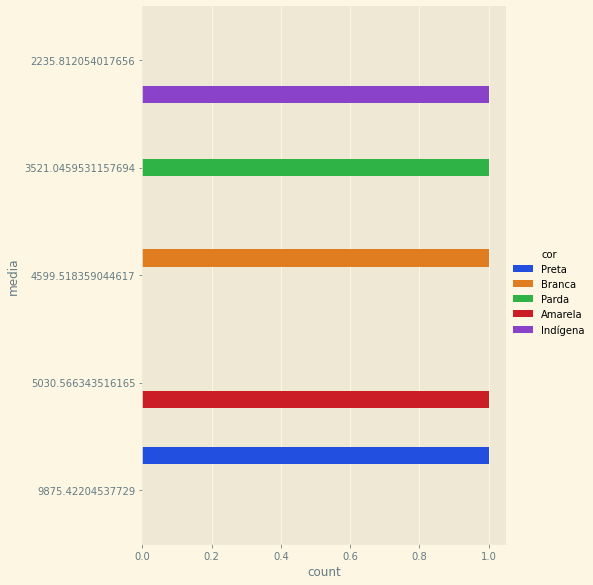

In [ ]:
sns.catplot(y='media',hue="cor", kind="count",height=8, palette = 'bright', aspect=0.9, data=media)


In [ ]:
TipoMovDemissao = {
31:'Demissão sem Justa Causa', 32:'Demissão com Justa Causa', 
33:'Culpa Recíproca', 40:'Desligamento a Pedido', 43:'Término contrato trabalho prazo determinado',
45:'Término de Contrato', 50:'Aposentadoria', 
60:'Desligamento por morte', 80:'Desligamento por Transferência', 
90:'Acordo Empregado e Empregador',
98:'Desligamento de Tipo Ignorado',
99:'Não Identificado'}

In [ ]:
df['tipomovimentacao2'] = df['tipomovimentacao2'].map(TipoMovDemissao)

In [ ]:
df.groupby('tipomovimentacao2').size()

tipomovimentacao2
Acordo Empregado e Empregador                   16785
Aposentadoria                                    1386
Culpa Recíproca                                  2317
Demissão com Justa Causa                        18593
Demissão sem Justa Causa                       874772
Desligamento a Pedido                          350933
Desligamento de Tipo Ignorado                      82
Desligamento por morte                           6854
Não Identificado                                 6905
Término contrato trabalho prazo determinado    238471
Término de Contrato                             12220
dtype: int64

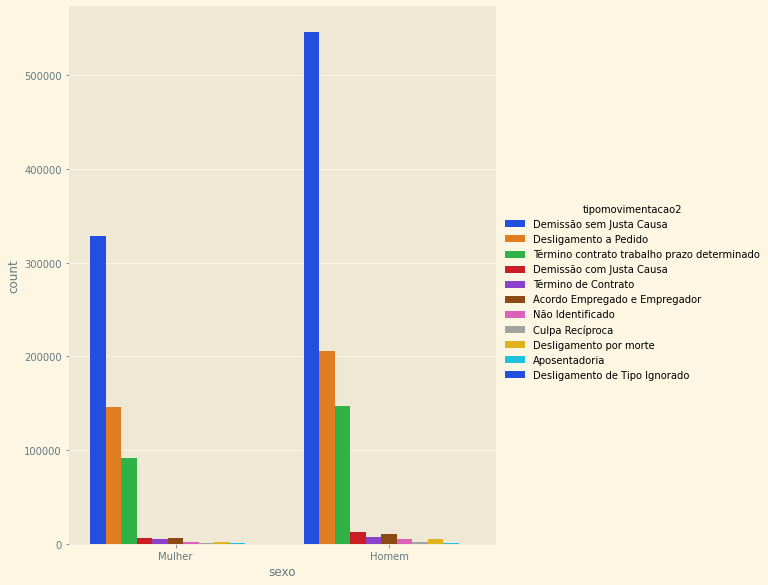

In [ ]:
sns.catplot(x="sexo",hue="tipomovimentacao2", kind="count",height=8, palette = 'bright', aspect=0.9, data=df)

In [ ]:
#Questão5
#5 - Quero poder visualizar as causas de demissão formalizadas pelos empregadores distribuídas por sexo, raça/cor e faixa etária;



In [ ]:
#Importando a base de dados
tabela = ('/content/drive/MyDrive/Colab Notebooks/CAGEDLIGTH.csv')
df = pd.read_csv(tabela, delimiter=';',
                encoding='UTF-8',
                error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# filtrando por tipomovimentação e sexo

tpmovsexo = df.filter(['tipomovimentacao','sexo'])

# remover a coluna que está 100% vazia
df = df.dropna(how='all', axis=1)

# remover a linha que tem um item vazio
df = df.dropna()

In [ ]:
sexo_troca = {1:'Homem', 3:'Mulher'}
df.loc[(df.sexo.isnull()), 'sexo'] = 9
df['sexo'] = df['sexo'].apply(lambda x: sexo_troca[x])

In [ ]:
#MUDEI AQUI
raca_troca = {1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena', 6:'Não informada', 9:'Não identificada'}
df.loc[(df.racacor.isnull()), 'racacor'] = 9
df['racacor'] = df['racacor'].apply(lambda x: raca_troca[x])

In [ ]:
#MUDEI AQUI
#Cria o dataframe tipo_mov para ser usado no topico 5
tpmv_trocaB = {31:'Demissão sem justa causa', 43:'Desconsiderar', 60:'Desconsiderar', 33:'Desconsiderar', 99:'Desconsiderar', 32:'Demissão com justa causa', 40:'Desligamento a pedido', 45:'Término de contrato', 50:'Aposentadoria', 80:'Desligamento por transferência', 90:'Desligamento por Acordo', 98:'Desligamento de Tipo Ignorado', 10:'Admissão', 20:'Admissão', 25:'Admissão', 35:'Admissão', 70:'Admissão'}

tipo_mov = pd.DataFrame(columns=['tipomovimentacao','racacor','sexo','idade'])

tipo_mov['tipomovimentacao'] = df['tipomovimentacao']
tipo_mov['racacor'] = df['racacor']
tipo_mov['sexo'] = df['sexo']
tipo_mov['idade'] = df['idade']

tipo_mov.loc[tipo_mov.tipomovimentacao.isnull(), 'tipomovimentacao'] = 9
tipo_mov['tipomovimentacao'] = tipo_mov['tipomovimentacao'].apply(lambda x: tpmv_trocaB[x])

tipo_mov.sample(5)

,tipomovimentacao,racacor,sexo,idade
577006,Admissão,Parda,Homem,36.0
1048202,Demissão sem justa causa,Parda,Homem,36.0
1688244,Demissão sem justa causa,Branca,Mulher,19.0
2897387,Demissão sem justa causa,Parda,Homem,30.0
917962,Demissão sem justa causa,Não informada,Homem,24.0


In [ ]:
#MUDEI AQUI
indexNames = tipo_mov[tipo_mov['tipomovimentacao'] == 'Admissão'].index
tipo_mov.drop(indexNames , inplace=True)
indexNames = tipo_mov[tipo_mov['tipomovimentacao'] == 'Desconsiderar'].index
tipo_mov.drop(indexNames , inplace=True)

In [ ]:
tpmv_troca = {31:'Demissão', 43:'Desconsiderar', 60:'Desconsiderar', 33:'Desconsiderar', 99:'Desconsiderar', 32:'Demissão', 40:'Demissão', 45:'Demissão', 50:'Demissão', 80:'Demissão', 90:'Demissão', 98:'Demissão', 10:'Admissão', 20:'Admissão', 25:'Admissão', 35:'Admissão', 70:'Admissão'}
 
df.loc[(df.tipomovimentacao.isnull()), 'tipomovimentacao'] = 9
df['tipomovimentacao'] = df['tipomovimentacao'].apply(lambda x: tpmv_troca[x])

In [ ]:
#MUDEI AQUI
#Organiza as idades em faixas 
tipo_mov.loc[tipo_mov.idade.isnull(), 'idade'] = 9
tipo_mov.loc[tipo_mov.idade <= 20,'idade'] = 1
tipo_mov.loc[(tipo_mov.idade >= 21) & (tipo_mov.idade <= 30),'idade'] = 2
tipo_mov.loc[(tipo_mov.idade > 30) & (tipo_mov.idade <= 40),'idade'] = 3
tipo_mov.loc[(tipo_mov.idade > 40) & (tipo_mov.idade <= 60),'idade'] = 4
tipo_mov.loc[(tipo_mov.idade > 60) & (tipo_mov.idade <= 80),'idade'] = 5
tipo_mov.loc[tipo_mov.idade > 80,'idade'] = 6

In [ ]:
#Estilos usados no layout do gráfico "Solarize_Light e bmh"
plt.style.use("Solarize_Light2")

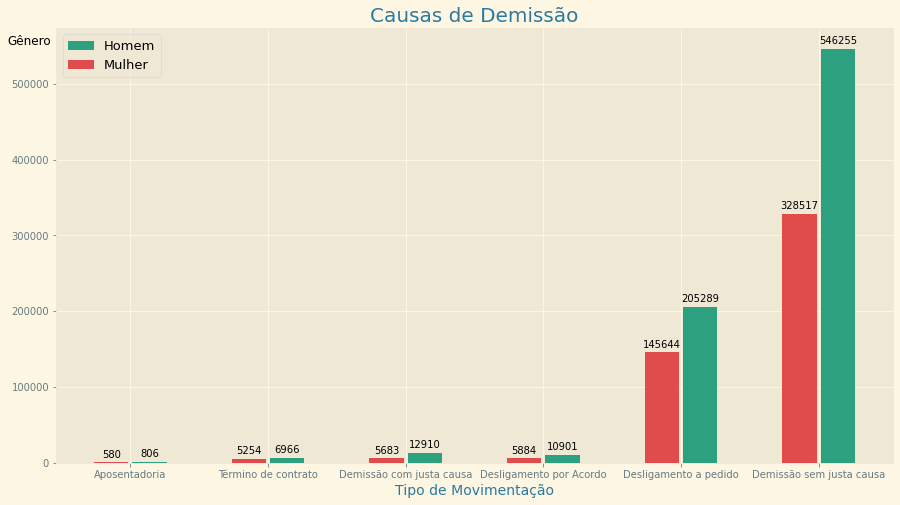

In [ ]:
#GRAFICOS DO TOPICO 5:
Branca = tipo_mov.query('racacor == "Branca"').groupby('tipomovimentacao').size().sort_values().tail(7)
Preta = tipo_mov.query('racacor == "Preta"').groupby('tipomovimentacao').size().sort_values().tail(7)
Parda = tipo_mov.query('racacor == "Parda"').groupby('tipomovimentacao').size().sort_values().tail(7)
Amarela = tipo_mov.query('racacor == "Amarela"').groupby('tipomovimentacao').size().sort_values().tail(7)
Indígena = tipo_mov.query('racacor == "Indígena"').groupby('tipomovimentacao').size().sort_values().tail(7)

Homem = tipo_mov.query('sexo == "Homem"').groupby('tipomovimentacao').size().sort_values().tail(7)
Mulher = tipo_mov.query('sexo == "Mulher"').groupby('tipomovimentacao').size().sort_values().tail(7)

n_homem = dict(Homem)
n_mulher = dict(Mulher)
n_preta = dict(Preta)
n_branca = dict(Branca)
n_parda = dict(Parda)
n_amarela = dict(Amarela)
n_indígena = dict(Indígena)


dados = {}

tipomovimentacao = list(n_mulher.keys()) + list(n_homem.keys()) + list(n_preta.keys()) + list(n_branca.keys()) + list(n_parda.keys()) + list(n_amarela.keys()) + list(n_indígena.keys())

tipomovimentacao = list(dict.fromkeys(tipomovimentacao))
dados_grafico = {'tipomovimentacao': [], 'Mulher': [], 'Homem': [],'Preta': [],'Branca': [],'Parda': [],'Amarela': [], 'Indígena': []}
for tipomovimentacao in tipomovimentacao :
    if(tipomovimentacao in n_mulher.keys() and tipomovimentacao in n_homem.keys() and tipomovimentacao in n_preta.keys() and tipomovimentacao in n_branca.keys() and tipomovimentacao in n_parda.keys() and tipomovimentacao in n_amarela.keys() and tipomovimentacao in n_indígena.keys()):
        dados_grafico['tipomovimentacao'].append(tipomovimentacao)
        dados_grafico['Homem'].append(n_homem[tipomovimentacao])
        dados_grafico['Mulher'].append(n_mulher[tipomovimentacao])
        dados_grafico['Preta'].append(n_preta[tipomovimentacao])
        dados_grafico['Branca'].append(n_branca[tipomovimentacao])
        dados_grafico['Parda'].append(n_parda[tipomovimentacao])
        dados_grafico['Amarela'].append(n_amarela[tipomovimentacao])
        dados_grafico['Indígena'].append(n_indígena[tipomovimentacao])
        
labels = dados_grafico['tipomovimentacao']
Homem = dados_grafico['Homem']
Mulher = dados_grafico['Mulher']
Preta = dados_grafico['Preta']
Branca = dados_grafico['Branca']
Parda = dados_grafico['Parda']
Amarela = dados_grafico['Amarela']
Indígena = dados_grafico['Indígena']

x = np.arange(len(labels)) 
width = 0.25

fig, ax = plt.subplots(1,1,figsize=(15,8))
rects1 = ax.bar(x + width/1.80, Homem, width, label='Homem', color='#2CA07F')
rects2 = ax.bar(x - width/1.80, Mulher, width, label='Mulher', color = '#E04B4B')


plt.xlabel('Tipo de Movimentação',color ='#2C79A0', fontsize=14, ha='center')
plt.figtext(.1,.85,'Gênero',color ='k', fontsize=12, ha='center')
ax.set_title('Causas de Demissão', fontsize=20,color ='#2C79A0')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(loc=2,prop={'size':13})
plt.style.use("bmh")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects1)
autolabel(rects2)
plt.show()

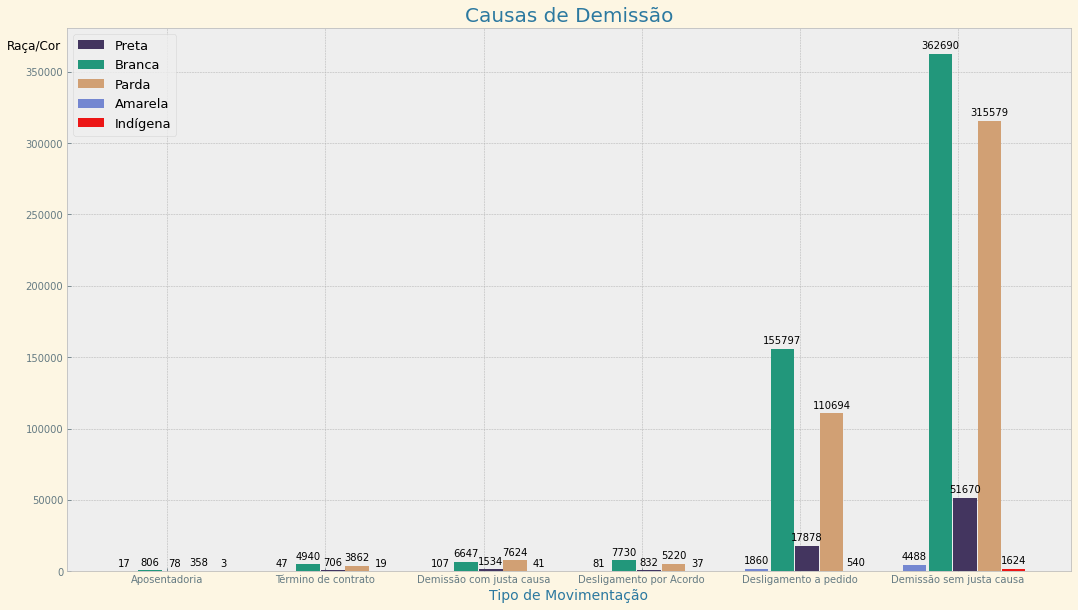

In [ ]:
Branca = tipo_mov.query('racacor == "Branca"').groupby('tipomovimentacao').size().sort_values().tail(7)
Preta = tipo_mov.query('racacor == "Preta"').groupby('tipomovimentacao').size().sort_values().tail(7)
Parda = tipo_mov.query('racacor == "Parda"').groupby('tipomovimentacao').size().sort_values().tail(7)
Amarela = tipo_mov.query('racacor == "Amarela"').groupby('tipomovimentacao').size().sort_values().tail(7)
Indígena = tipo_mov.query('racacor == "Indígena"').groupby('tipomovimentacao').size().sort_values().tail(7)

Homem = tipo_mov.query('sexo == "Homem"').groupby('tipomovimentacao').size().sort_values().tail(7)
Mulher = tipo_mov.query('sexo == "Mulher"').groupby('tipomovimentacao').size().sort_values().tail(7)

n_homem = dict(Homem)
n_mulher = dict(Mulher)
n_preta = dict(Preta)
n_branca = dict(Branca)
n_parda = dict(Parda)
n_amarela = dict(Amarela)
n_indígena = dict(Indígena)


dados = {}

tipomovimentacao = list(n_mulher.keys()) + list(n_homem.keys()) + list(n_preta.keys()) + list(n_branca.keys()) + list(n_parda.keys()) + list(n_amarela.keys()) + list(n_indígena.keys())

tipomovimentacao = list(dict.fromkeys(tipomovimentacao))
dados_grafico = {'tipomovimentacao': [], 'Mulher': [], 'Homem': [],'Preta': [],'Branca': [],'Parda': [],'Amarela': [], 'Indígena': []}
for tipomovimentacao in tipomovimentacao :
    if(tipomovimentacao in n_mulher.keys() and tipomovimentacao in n_homem.keys() and tipomovimentacao in n_preta.keys() and tipomovimentacao in n_branca.keys() and tipomovimentacao in n_parda.keys() and tipomovimentacao in n_amarela.keys() and tipomovimentacao in n_indígena.keys()):
        dados_grafico['tipomovimentacao'].append(tipomovimentacao)
        dados_grafico['Homem'].append(n_homem[tipomovimentacao])
        dados_grafico['Mulher'].append(n_mulher[tipomovimentacao])
        dados_grafico['Preta'].append(n_preta[tipomovimentacao])
        dados_grafico['Branca'].append(n_branca[tipomovimentacao])
        dados_grafico['Parda'].append(n_parda[tipomovimentacao])
        dados_grafico['Amarela'].append(n_amarela[tipomovimentacao])
        dados_grafico['Indígena'].append(n_indígena[tipomovimentacao])
        
labels = dados_grafico['tipomovimentacao']
Homem = dados_grafico['Homem']
Mulher = dados_grafico['Mulher']
Preta = dados_grafico['Preta']
Branca = dados_grafico['Branca']
Parda = dados_grafico['Parda']
Amarela = dados_grafico['Amarela']
Indígena = dados_grafico['Indígena']

x = np.arange(len(labels)) 
width = 0.15

fig, ax = plt.subplots(1,1,figsize=(18,10))

rects3 = ax.bar(x + (width/1.80)-0.037, Preta, width, label='Preta', color = '#43355F')
rects4 = ax.bar(x - (width/1.80)-0.026, Branca, width, label='Branca', color = '#22977B')
rects5 = ax.bar(x + (width/1.80)+0.118, Parda, width, label='Parda', color = '#D1A074')
rects6 = ax.bar(x - (width/1.80)-0.190, Amarela, width, label='Amarela', color = '#7487D1')
rects7 = ax.bar(x + (width/1.80)+0.270, Indígena, width, label='Indígena', color = '#EC1616')

plt.xlabel('Tipo de Movimentação',color ='#2C79A0', fontsize=14, ha='center')
plt.figtext(.1,.85,'Raça/Cor',color ='k', fontsize=12, ha='center')
ax.set_title('Causas de Demissão', fontsize=20,color ='#2C79A0')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(loc=2,prop={'size':13})
plt.style.use("bmh")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 



autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
plt.show()

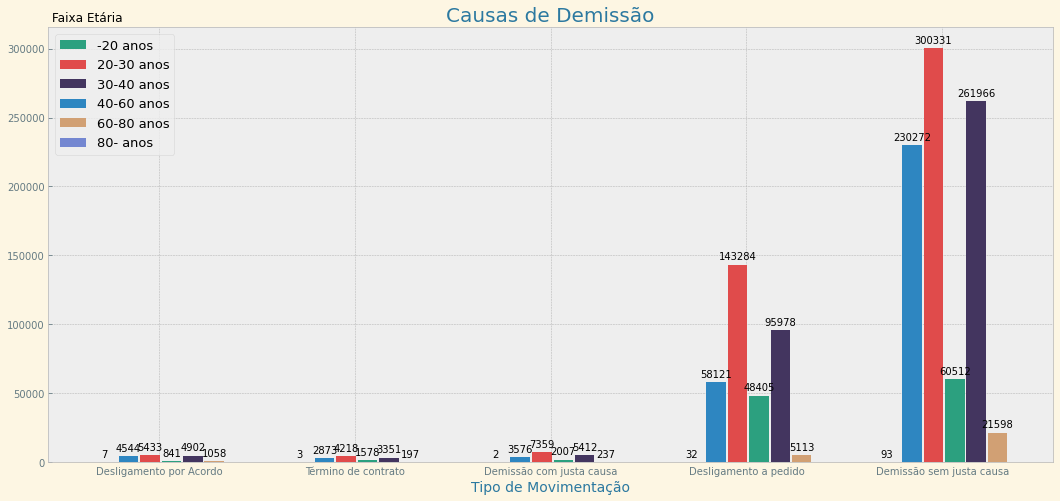

In [ ]:
vinte = tipo_mov.query('idade == 1').groupby('tipomovimentacao').size().sort_values().tail(7)
trinta = tipo_mov.query('idade == 2').groupby('tipomovimentacao').size().sort_values().tail(7)
quarenta = tipo_mov.query('idade == 3').groupby('tipomovimentacao').size().sort_values().tail(7)
sess = tipo_mov.query('idade == 4').groupby('tipomovimentacao').size().sort_values().tail(7)
oit = tipo_mov.query('idade == 5').groupby('tipomovimentacao').size().sort_values().tail(7)
maiorOit = tipo_mov.query('idade == 6').groupby('tipomovimentacao').size().sort_values().tail(7)

n_vinte = dict(vinte)
n_trinta = dict(trinta)
n_quarenta = dict(quarenta)
n_sess = dict(sess)
n_oit = dict(oit)
n_maiorOit = dict(maiorOit)

dados = {}

tipomovimentacao = list(n_vinte.keys()) + list(n_trinta.keys()) + list(n_quarenta.keys()) + list(n_sess.keys()) + list(n_oit.keys()) + list(n_maiorOit.keys())

tipomovimentacao = list(dict.fromkeys(tipomovimentacao))
dados_grafico = {'tipomovimentacao': [], 'vinte': [], 'trinta': [],'quarenta': [],'sess': [],'oit': [],'maiorOit': []}
for tipomovimentacao in tipomovimentacao :
    if(tipomovimentacao in n_vinte.keys() and tipomovimentacao in n_trinta.keys() and tipomovimentacao in n_quarenta.keys() and tipomovimentacao in n_sess.keys() and tipomovimentacao in n_oit.keys() and tipomovimentacao in n_maiorOit.keys()):
        dados_grafico['tipomovimentacao'].append(tipomovimentacao)
        dados_grafico['vinte'].append(n_vinte[tipomovimentacao])
        dados_grafico['trinta'].append(n_trinta[tipomovimentacao])
        dados_grafico['quarenta'].append(n_quarenta[tipomovimentacao])
        dados_grafico['sess'].append(n_sess[tipomovimentacao])
        dados_grafico['oit'].append(n_oit[tipomovimentacao])
        dados_grafico['maiorOit'].append(n_maiorOit[tipomovimentacao])
        
labels = dados_grafico['tipomovimentacao']
vinte = dados_grafico['vinte']
trinta = dados_grafico['trinta']
quarenta = dados_grafico['quarenta']
sess = dados_grafico['sess']
oit = dados_grafico['oit']
maiorOit = dados_grafico['maiorOit']


x = np.arange(len(labels)) 
width = 0.10

fig, ax = plt.subplots(1,1,figsize=(18,8))

rects1 = ax.bar(x + (width/1.80)+0.009, vinte, width, label='-20 anos', color='#2CA07F')
rects2 = ax.bar(x - (width/1.80)+0.010, trinta, width, label='20-30 anos', color = '#E04B4B')
rects3 = ax.bar(x + (width/1.80)+0.118, quarenta, width, label='30-40 anos', color = '#43355F')
rects4 = ax.bar(x - (width/1.80)-0.1, sess, width, label='40-60 anos', color = '#2E86C1')
rects5 = ax.bar(x + (width/1.80)+0.226, oit, width, label='60-80 anos', color = '#D1A074')
rects6 = ax.bar(x - (width/1.80)-0.226, maiorOit, width, label='80- anos', color = '#7487D1')

plt.xlabel('Tipo de Movimentação',color ='#2C79A0', fontsize=14, ha='center')
plt.figtext(.155,.89,'Faixa Etária',color ='k', fontsize=12, ha='center')
ax.set_title('Causas de Demissão', fontsize=20,color ='#2C79A0')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(loc=2,prop={'size':13})
plt.style.use("bmh")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
plt.show()